# Problem Set 2 - B

## Yanwei Pan
panyw@uchicago.edu

### Question 2: Numerical integration exercises

In [12]:
#############Exercise 2.1#############

import numpy as np
from matplotlib import pyplot as plt
def g(x):
    return 0.1 * (x ** 4) - 1.5 * (x ** 3) + 0.53 * (x ** 2) + 1

#midpoint
def mid_point(f, a, b, N):
    x = [a + (((2 * i) + 1) * (b - a)) / (2 * N) for i in range(N)]
    f_sum = sum(list(map(f, x)))
    integral = ((b - a) / N) * f_sum
    return integral

#trapezoid
def trapezoid(f, a, b, N):
    x = [a + ((i * (b - a)) / N) for i in range(N)]
    f_sum = sum(list(map(f, x)))
    integral = ((b - a) / (2 * N)) * (a + 2 * f_sum + b)
    return integral

#Simpsons
def Simpsons(f, a, b, N):
    x = [a + ((i * (b - a)) / (2 * N)) for i in range(2 * N)]
    x_odds = x[::2]
    x_even = x[1::2]
    f_sum_odds = sum(list(map(f, x_odds)))
    f_sum_even = sum(list(map(f, x_even)))
    integral = ((b - a) / (6 * N)) * (a + 4 * f_sum_odds + 2 * \
                                      f_sum_even + b)
    return integral

Nvec = np.arange(20, 201, 1)

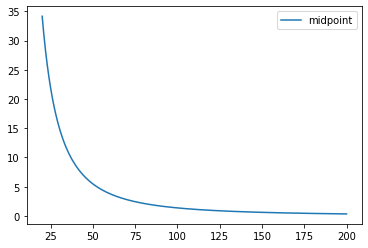

In [15]:
##### a #####

#midpoint plot
d_1 = [abs(mid_point(g, -10, 10, n) - true) for n in Nvec]
plt.plot(Nvec, d_1, label='midpoint')
plt.legend()

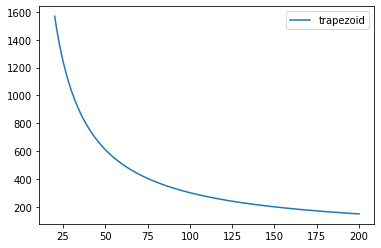

In [16]:
#trapezoid plot
d_2 = [abs(trapezoid(g, -10, 10, n) - true) for n in Nvec]
plt.plot(Nvec, d_2, label='trapezoid')
plt.legend()

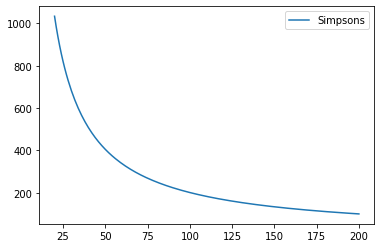

In [17]:
#Simpsons plot
d_3 = [abs(Simpsons(g, -10, 10, n) - true) for n in Nvec]
plt.plot(Nvec, d_3, label='Simpsons')
plt.legend()

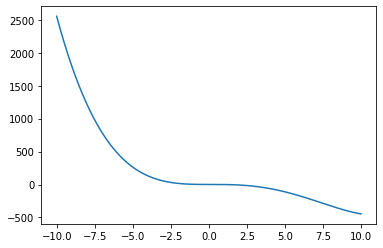

In [19]:
##### b #####
x = np.linspace(-10, 10, 1000)
plt.plot(x, g(x))

We can see that, midpoint method has the smallest difference, then is the Simpson's method and the trapezoid method. This is because the function g is far away from a straight line and a parabola. The curvature of function g is large and change greatly in the scale. Therefore, the integral calculated by midpoint method is the closest to the true value. In addition, compared with a straight line, the plot of function g is more like a parabola. Thus, the Simpson's rule is better than trapezoid.

In [20]:
#############Exercise 2.2#############

import pandas as pd
import scipy.stats as sts

def Normal(mean, std, k, N):
    a = mean - std * k
    b = mean + std * k
    z = np.linspace(a, b, N)
    midpoint = (z[1:] + z[:-1]) / 2
    w1 = sts.norm.cdf(midpoint[0], mean, std)
    wi = sts.norm.cdf(midpoint, mean, std)
    wi_1 = np.diff(wi).tolist()
    wn = 1 - sts.norm.cdf(midpoint[-1], mean, std)
    weight = [w1] + wi_1 + [wn]
    z = z.tolist()
    data_frame = pd.DataFrame({'Nodes' : z, 'Weights' : weight})
    return data_frame

Normal(5, 1.5, 3, 11)

,Nodes,Weights
0,0.5,0.003467
1,1.4,0.014397
2,2.3,0.048943
3,3.2,0.117253
4,4.1,0.198028
5,5.0,0.235823
6,5.9,0.198028
7,6.8,0.117253
8,7.7,0.048943
9,8.6,0.014397


In [21]:
#############Exercise 2.3#############

def lognorm(mean, std, k, N):
    df = Normal(mean, std, k, N)
    weight = df['Weights']
    z = df['Nodes']
    z = np.exp(z).tolist()
    df_new = pd.DataFrame({'Nodes' : z, 'Weights' : weight})
    return df_new

lognorm(5, 1.5, 3, 11)

,Nodes,Weights
0,1.648721,0.003467
1,4.055200,0.014397
2,9.974182,0.048943
3,24.532530,0.117253
4,60.340288,0.198028
5,148.413159,0.235823
6,365.037468,0.198028
7,897.847292,0.117253
8,2208.347992,0.048943
9,5431.659591,0.014397


In [22]:
#############Exercise 2.4#############

y = lognorm(10.5, 0.8, 3, 11)
approx = sum(y['Nodes'] * y['Weights'])
diff = abs(approx - np.exp(10.5 + (0.8 ** 2) / 2))
print('The difference between approximation \
and exact expected value of income = {}'.format(diff))

The difference between approximation and exact expected value of income = 341.3691842441549


In [23]:
#############Exercise 3.1#############
a = -10
b = 10
N = 3
from scipy import optimize

def h(x):
    h = []
    for i in range(2 * N):
        w,z = x[:N], x[N:]
        h.append((b ** (i + 1) - a ** (i + 1)) / (i + 1) - \
                        np.sum([w[q] * (z[q]**i) for q in range(N)]))
    return h

def Gaussian(f, a, b, N):
    init_weight = [1/N for i in range(N)]
    x0 = [0 for i in range(N)]
    init_value = init_weight + x0
    wn = optimize.root(h, init_value).x
    w = wn[:N]
    z = wn[N:]
    approx = 0
    for i in range(N):
        approx += w[i] * f(z[i])
    return approx

integral = Gaussian(g , -10, 10, 3)
true = 4373.33
d =  abs(integral - true)
d1 = abs(integral - mid_point(g, -10, 10, 3))
d2 = abs(integral - trapezoid(g, -10, 10, 3))
d3 = abs(integral - Simpsons(g, -10, 10, 3))
print('Gaussian Approximation = {}'.format(integral)) 
print('The difference between Gaussian approximation \
and Midpoint/Trapezoid/Simpsons Methods = {}/{}/{}'.format(d1, d2, d3))
print('The difference between Gaussian approximation and the true \
known value = {}'.format(d))

Gaussian Approximation = 4373.333334986544
The difference between Gaussian approximation and Midpoint/Trapezoid/Simpsons Methods = 1405.5144049453938/12909.794237029919/8138.024689704815
The difference between Gaussian approximation and the true known value = 0.003334986544359708


In [74]:
#############Exercise 3.2#############

from scipy.integrate import quad
quad_approx = quad(g, -10, 10)[0]
print('The difference between quad command approximation and the true \
known value = {}'.format(abs(quad_approx - true)))

The difference between quad command approximation and the true known value = 0.0033333333340124227


In [35]:
#############Exercise 4.1#############

np.random.seed=25

def g_mc(x, y):
    if x ** 2 + y ** 2 <= 1:
        return 1
    else:
        return 0

i = 1
while i:
    x = np.random.uniform(-1, 1, i)
    y = np.random.uniform(-1, 1, i)
    area = 4 * np.mean(list(map(g_mc, x, y)))
    if round(area, 4) == 3.1415:
        print('The smallest number of random draw N = {}'.format(i))
        print('pi = {}'.format(area))
        break
    else:
        i += 1

The smallest number of random draw N = 1859
pi = 3.14147391070468


In [29]:
#############Exercise 4.2#############

def isPrime(n):
    for i in range(2, int(np.sqrt(n) + 1)):
        if n % i == 0:
            return False
        return True
    
def primes_ascend(N, min_val=2):
    primes_vec = np.zeros(N, dtype=int)
    MinIsEven = 1 - min_val % 2
    MinIsGrtrThn2 = min_val > 2
    curr_prime_ind = 0
    if not MinIsGrtrThn2:
        i = 2
        curr_prime_ind += 1
        primes_vec[0] = i
    i = min(3, min_val + (MinIsEven * 1))
    while curr_prime_ind < N:
        if isPrime(i):
            curr_prime_ind += 1
            primes_vec[curr_prime_ind - 1] = i
        i += 2
        
    return primes_vec

def find_pair(i, dimension, sequence):
    vec = primes_ascend(dimension)
    if sequence == 'Weyl':
        s = np.sqrt(vec) * i
    elif sequence == 'Haber':
        s = np.sqrt(vec) * (i * (i + 1) / 2)
    elif sequence == 'Niederreiter':
        s = [i * 2 ** (n / (i + 1)) for n in range(1, dimension+1)]
        s = np.array(s)
    elif sequence == 'Baker':
        s = i * np.exp(vec)
    s = s - np.floor(s)
    return s

print('The 1073th element of the 2-dimentional Weyl sequence is', find_pair(1073, 2, 'Weyl'))
print('The 1073th element of the 2-dimentional Haber sequence is', find_pair(1073, 2, 'Haber'))
print('The 1073th element of the 2-dimentional Niederreiter sequence is', find_pair(1073, 2, 'Niederreiter'))
print('The 1073th element of the 2-dimentional Baker sequence is', find_pair(1073, 2, 'Baker'))

The 1073th element of the 2-dimentional Weyl sequence is [0.45115243 0.30093986]
The 1073th element of the 2-dimentional Haber sequence is [0.26885294 0.60470336]
The 1073th element of the 2-dimentional Niederreiter sequence is [0.69272531 0.38589783]
The 1073th element of the 2-dimentional Baker sequence is [0.45719415 0.31971706]


In [55]:
#############Exercise 4.3#############

def find_min_draw(dimension, sequence):
    np.random.seed=25
    n = 1
    while n:
        x = [2 * find_pair(i, dimension, sequence)[0] - 1 for i in range(n)]
        y = [2 * find_pair(i, dimension, sequence)[1] - 1 for i in range(n)]
        area = 4 * np.mean(list(map(g_mc, x, y)))
        if round(area, 4) == 3.1415:
            print('The smallest number of random draw N = {} in {} sequence'.\
                  format(i, sequence))
            print('pi = {}'.format(area))
            break
            
        elif n >= 2500:
            print('Inconvergent')
            break
        else:
            n += 1

find_min_draw(2, 'Weyl')

Inconvergent


In [56]:
find_min_draw(2, 'Haber')

The smallest number of random draw N = 1859 in Haber sequence
pi = 3.1415044713308786


In [57]:
find_min_draw(2, 'Niederreiter')

Inconvergent


In [58]:
find_min_draw(2, 'Baker')

The smallest number of random draw N = 1859 in Baker sequence
pi = 3.141509433962264
